Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


In [9]:
print(y_true)

[0 0 4 1 1 4 4 2 1 2 4 3 0 3 4 3 2 1 0 3 3 3 3 4 0 0 1 2 4 1 0 0 4 3 4 3 4
 0 0 1 3 4 4 4 3 4 0 3 1 2 1 4 2 4 0 0 0 0 1 3 2 3 1 0 1 3 3 3 3 0 0 1 1 1
 2 0 3 1 4 1 1 0 0 0 4 2 0 1 2 3 2 2 4 1 2 1 3 3 1 2 2 3 2 2 4 3 3 3 2 0 0
 4 2 3 3 4 1 2 2 4 4 3 3 0 2 4 4 2 2 3 3 2 4 1 0 1 4 3 3 0 2 2 3 3 3 0 3 3
 2 4 1 1 0 1 4 3 2 4 3 1 0 1 3 0 3 3 2 2 1 2 2 3 4 0 4 0 4 3 4 1 2 0 1 0 3
 0 4 3 0 1 1 0 2 3 2 1 0 0 3 4 4 3 3 4 0 2 4 1 2 2 0 3 3 3 4 3 2 3 4 1 2 0
 4 2 2 1 1 3 2 3 3 4 4 2 1 4 0 1 2 4 1 2 0 4 2 4 4 0 2 3 4 0 4 3 0 1 4 4 0
 3 3 1 4 2 3 0 0 0 2 0 2 2 0 3 3 4 1 2 4 3 0 0 4 0 1 3 4 2 2 2 2 4 1 0 0 1
 1 0 1 2 0 3 3 4 0 1 2 2 0 2 0 3 3 4 0 0 0 4 2 3 0 1 1 0 1 0 4 3 1 4 1 1 4
 3 0 1 3 4 2 1 4 3 2 1 0 0 2 0 1 4 1 3 1 2 1 4 0 1 3 0 0 2 0 1 0 4 0 4 4 0
 3 0 3 2 3 0 0 2 1 3 2 3 2 3 3 2 4 3 1 4 2 4 1 3 0 4 2 3 2 3 3 1 1 0 2 1 0
 1 2 1 2 0 0 2 4 0 4 2 1 0 1 4 0 3 3 3 2 1 1 1 2 1 0 0 1 0 4 1 0 4 0 0 3 3
 0 3 3 0 1 1 4 1 1 0 1 3 1 0 1 0 1 0 1 0 3 0 2 4 1 4 1 2 0 4 4 2 2 4 2 4 3
 1 4 3 2 3 0 1 3 3 4 2 2 

Smallest K-means Inertia Value: 924.32



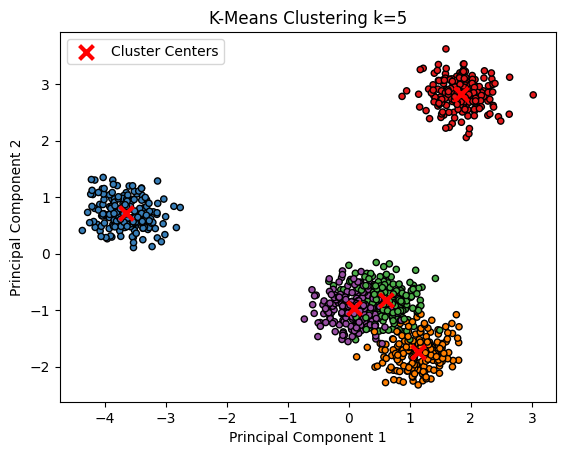

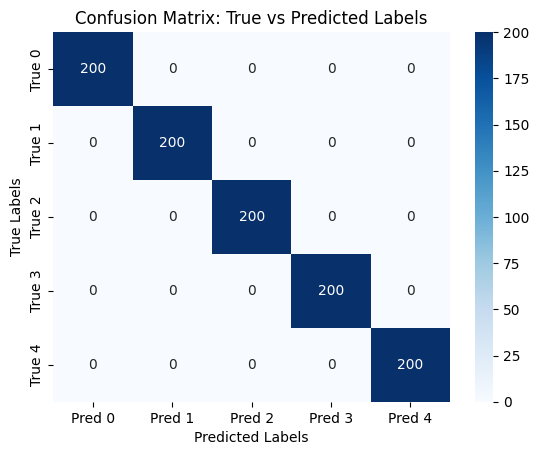

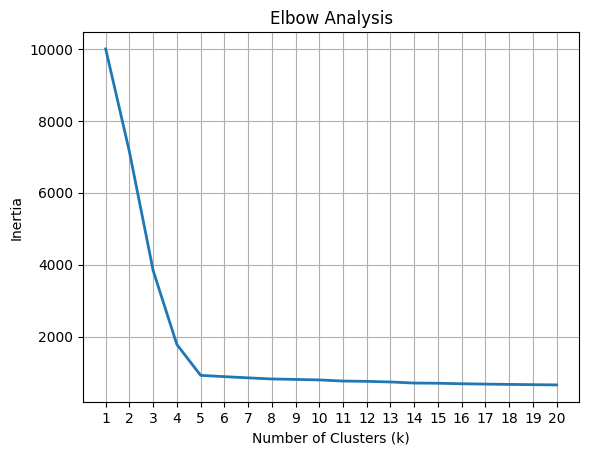


Inertia Values for Different Values of k:
k = 1: Inertia = 10000.00
k = 2: Inertia = 7139.16
k = 3: Inertia = 3836.38
k = 4: Inertia = 1780.42
k = 5: Inertia = 924.32
k = 6: Inertia = 887.74
k = 7: Inertia = 854.65
k = 8: Inertia = 823.30
k = 9: Inertia = 811.04
k = 10: Inertia = 796.77
k = 11: Inertia = 765.24
k = 12: Inertia = 756.95
k = 13: Inertia = 739.99
k = 14: Inertia = 709.94
k = 15: Inertia = 704.47
k = 16: Inertia = 690.57
k = 17: Inertia = 680.57
k = 18: Inertia = 672.75
k = 19: Inertia = 665.04
k = 20: Inertia = 657.88


In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
import random
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

np.random.seed(1)
random.seed(1)

kmeans_model = KMeans(n_clusters=5, random_state=1) # n_clusters = k, other params: n_init=1, init='random', max_iter=1
y_pred = kmeans_model.fit_predict(X)

pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

cluster_centers_pca = pca_model.transform(kmeans_model.cluster_centers_)

print(f"Smallest K-means Inertia Value: {kmeans_model.inertia_:.2f}")
print()

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='x', s=100, linewidth=3, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering k=5')
plt.legend()
plt.show()

print()
print()

cm = confusion_matrix(y_true, y_pred)

# Find the best label mapping
row_ind, col_ind = linear_sum_assignment(-cm)

# Create a mapping dictionary
label_mapping = {}
for i in range(len(row_ind)):
    label_mapping[col_ind[i]] = row_ind[i]

# Apply the mapping
y_pred_corrected = np.array([label_mapping[label] for label in y_pred])

cm_corrected = confusion_matrix(y_true, y_pred_corrected)

sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(5)],
            yticklabels=[f'True {i}' for i in range(5)])
plt.title('Confusion Matrix: True vs Predicted Labels')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

print()
print()

k_range = range(1, 21)
inertia_values = []

for k in k_range:
    kmeans_temp_val = KMeans(n_clusters=k, random_state=1)
    kmeans_temp_val.fit(X)
    inertia_values.append(kmeans_temp_val.inertia_)

plt.plot(k_range, inertia_values, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Analysis')
plt.grid(True)
plt.xticks(k_range)
plt.show()

print()
print("Inertia Values for Different Values of k:")

for i in range(len(k_range)):
  k = k_range[i]
  inertia = inertia_values[i]
  print(f"k = {k}: Inertia = {inertia:.2f}")

In [13]:
print(y_pred)
print(y_true)

confusion_matrix(y_true, y_pred)

[3 3 4 1 1 4 4 0 1 0 4 2 3 2 4 2 0 1 3 2 2 2 2 4 3 3 1 0 4 1 3 3 4 2 4 2 4
 3 3 1 2 4 4 4 2 4 3 2 1 0 1 4 0 4 3 3 3 3 1 2 0 2 1 3 1 2 2 2 2 3 3 1 1 1
 0 3 2 1 4 1 1 3 3 3 4 0 3 1 0 2 0 0 4 1 0 1 2 2 1 0 0 2 0 0 4 2 2 2 0 3 3
 4 0 2 2 4 1 0 0 4 4 2 2 3 0 4 4 0 0 2 2 0 4 1 3 1 4 2 2 3 0 0 2 2 2 3 2 2
 0 4 1 1 3 1 4 2 0 4 2 1 3 1 2 3 2 2 0 0 1 0 0 2 4 3 4 3 4 2 4 1 0 3 1 3 2
 3 4 2 3 1 1 3 0 2 0 1 3 3 2 4 4 2 2 4 3 0 4 1 0 0 3 2 2 2 4 2 0 2 4 1 0 3
 4 0 0 1 1 2 0 2 2 4 4 0 1 4 3 1 0 4 1 0 3 4 0 4 4 3 0 2 4 3 4 2 3 1 4 4 3
 2 2 1 4 0 2 3 3 3 0 3 0 0 3 2 2 4 1 0 4 2 3 3 4 3 1 2 4 0 0 0 0 4 1 3 3 1
 1 3 1 0 3 2 2 4 3 1 0 0 3 0 3 2 2 4 3 3 3 4 0 2 3 1 1 3 1 3 4 2 1 4 1 1 4
 2 3 1 2 4 0 1 4 2 0 1 3 3 0 3 1 4 1 2 1 0 1 4 3 1 2 3 3 0 3 1 3 4 3 4 4 3
 2 3 2 0 2 3 3 0 1 2 0 2 0 2 2 0 4 2 1 4 0 4 1 2 3 4 0 2 0 2 2 1 1 3 0 1 3
 1 0 1 0 3 3 0 4 3 4 0 1 3 1 4 3 2 2 2 0 1 1 1 0 1 3 3 1 3 4 1 3 4 3 3 2 2
 3 2 2 3 1 1 4 1 1 3 1 2 1 3 1 3 1 3 1 3 2 3 0 4 1 4 1 0 3 4 4 0 0 4 0 4 2
 1 4 2 0 2 3 1 2 2 4 0 0 

array([[  0,   0,   0, 200,   0],
       [  0, 200,   0,   0,   0],
       [200,   0,   0,   0,   0],
       [  0,   0, 200,   0,   0],
       [  0,   0,   0,   0, 200]])

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here